Financial Pressure Indicator Goldman Sachs

FPI = (▲e/e) - (Õ (▲e/e)/(Õ (▲r /r)) X (▲r /r)

Donde=

(▲e/e) = Tasa de Devaluación del Tipo de Cambio (lo hacemos a tipo oficial y blue)

(Õ (▲e/e)/(Õ (▲r /r)) = Ajuste volatilidad.

(▲r /r) = Variación de Reservas del Banco Central.

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import BCRA
import yfinance as yahoo

auth_token, head = BCRA.auth_token, BCRA.head

Obtenemos la serie de Reservas

In [ ]:
res = requests.get(BCRA.reserves, headers=head)
reservas = pd.DataFrame(res.json())
reservas.index = reservas.d
del reservas ['d']
reservas = reservas.rename(columns={'v':'stock'})
re = reservas.plot(figsize=(15,7))
re.grid()

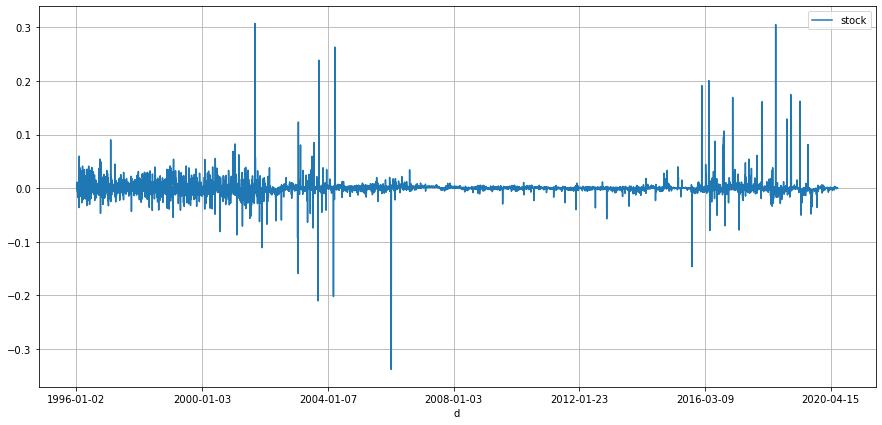

In [3]:
repct = reservas.pct_change().plot(figsize=(15,7))
repct.grid()

Obtenemos el TC Oficial según BCRA

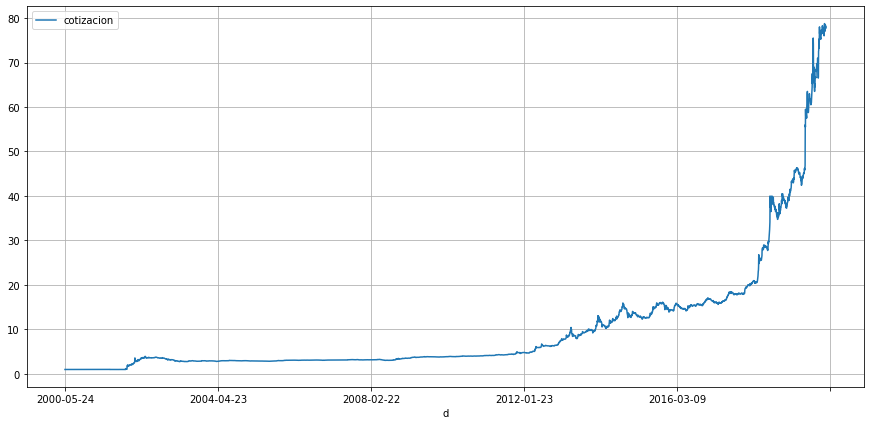

In [4]:
usd = requests.get(BCRA.usd, headers=head)
dolar = pd.DataFrame(usd.json())
dolar.index = dolar.d
del dolar ['d']
dolar = dolar.rename(columns={'v':'cotizacion'})
usd = dolar.plot(figsize=(15,7))
usd.grid()

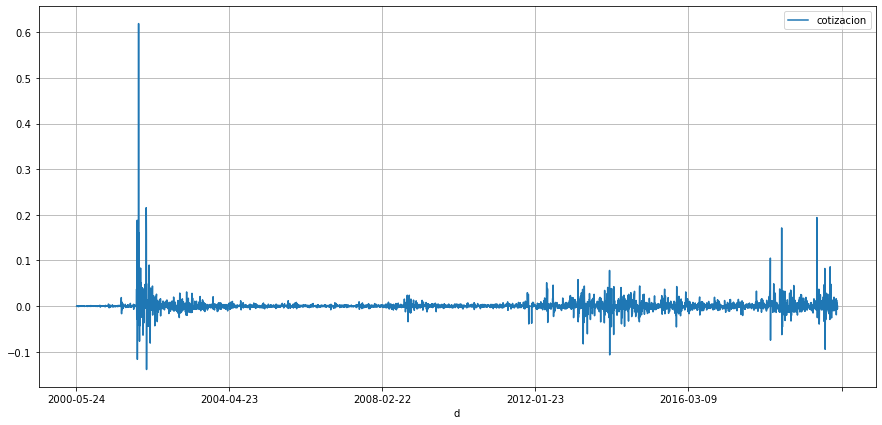

In [5]:
dol = dolar.pct_change().plot(figsize=(15,7))
dol.grid()

[*********************100%***********************]  2 of 2 completed


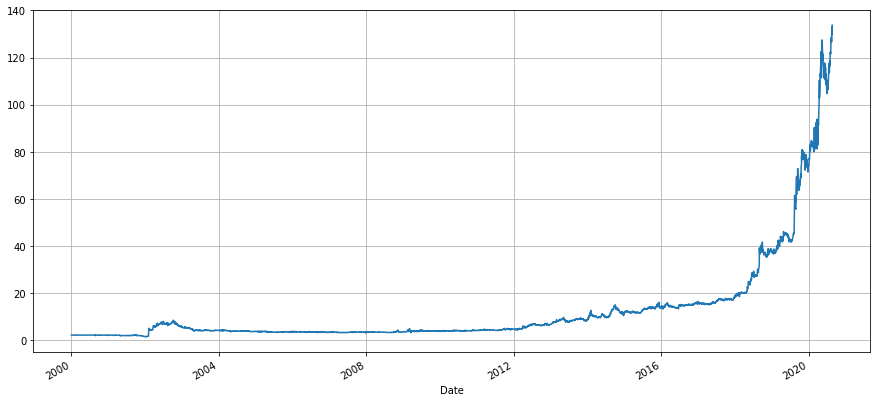

In [6]:
ypf = yahoo.download("YPF YPFD.BA",period="max")['Adj Close'].fillna(method="ffill")
ypf = ypf.dropna()
ypf = ypf.rename(columns={'YPFD.BA':'YPFDBA'})
tcypf = ypf.YPFDBA / ypf.YPF
tipoypf = tcypf.plot(figsize=(15,7))
tipoypf.grid()

Agregamos el tipo de cambio del cedear de Apple (AAPL.BA / AAPL) * 10

[*********************100%***********************]  2 of 2 completed


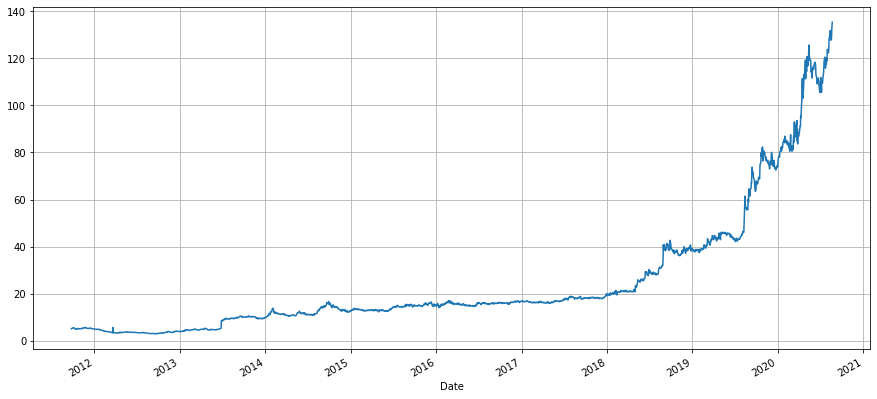

In [7]:
aapl = yahoo.download("AAPL AAPL.BA",period="10y")['Adj Close'].fillna(method="ffill")
aapl = aapl.dropna()
aapl = aapl.rename(columns={'AAPL.BA':'AAPLBA'})
tcaapl = (aapl.AAPLBA / aapl.AAPL) * 10
tipoapple = tcaapl.plot(figsize=(15,7))
tipoapple.grid()

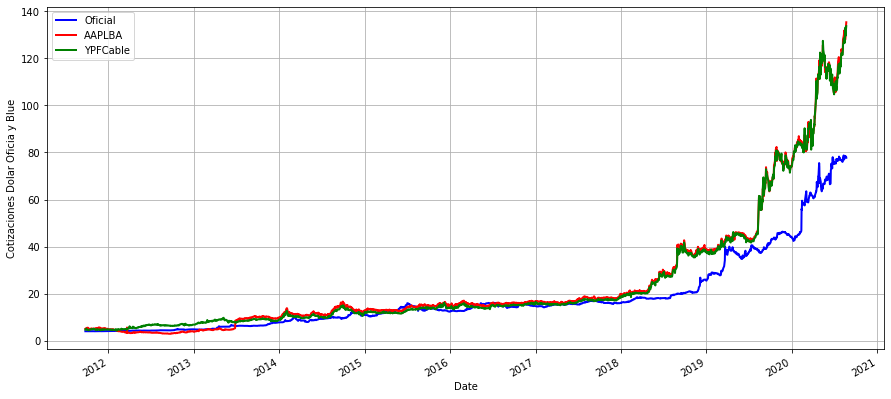

In [8]:
dolar2010 = dolar.cotizacion.tail(2298)
trescambios = pd.DataFrame(index=tcaapl.index)
trescambios['AAPLBA'] = tcaapl.values
trescambios['YPFCable'] = tcypf.tail(2298).values
trescambios['Oficial'] = dolar2010.values
fig = plt.figure(figsize=(15,7))
ax1 = fig.add_subplot(111, ylabel='Cotizaciones Dolar Oficia y Blue')
trescambios.Oficial.plot(ax=ax1, color='b', lw=2., legend=True)
trescambios.AAPLBA.plot(ax=ax1, color='r', lw=2., legend=True)
trescambios.YPFCable.plot(ax=ax1, color='g', lw=2., legend=True)
ax1.grid()
plt.show()


In [9]:
#(▲e/e) = Tasa de Devaluación del Tipo de Cambio

devaluacion = dolar.cotizacion.pct_change(1)  

devaluacion

d
2000-05-24         NaN
2000-05-25    0.000000
2000-05-26   -0.000100
2000-05-29    0.000300
2000-05-30    0.000200
                ...   
2020-02-20    0.006410
2020-02-21   -0.006369
2020-02-26    0.003205
2020-02-27   -0.006390
2020-02-28    0.000000
Name: cotizacion, Length: 4975, dtype: float64

In [10]:
#(▲r /r) = Variación de Reservas del Banco Central.

peligro_reservas = reservas.stock.pct_change(1) 

peligro_reservas

d
1996-01-02         NaN
1996-01-03    0.005198
1996-01-04    0.001781
1996-01-05    0.009980
1996-01-08    0.003691
                ...   
2020-06-29    0.000023
2020-06-30    0.000949
2020-07-01   -0.000532
2020-07-02   -0.000370
2020-07-03    0.000370
Name: stock, Length: 6055, dtype: float64

In [11]:
# Desvio Estandar del tipo de cambio y reservas

sigma_tc = dolar.cotizacion.pct_change().rolling(20).std()

sigma_reservas = reservas.stock.pct_change().rolling(20).std()

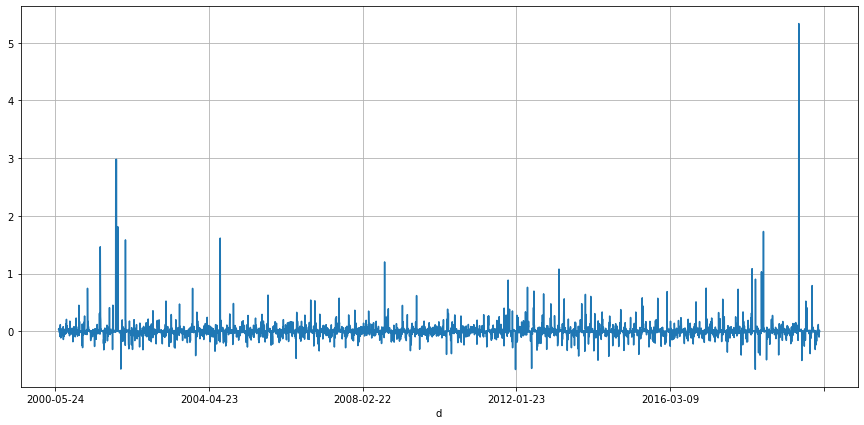

In [12]:
tipodecambio = sigma_tc.pct_change().plot(figsize=(15,7))
tipodecambio.grid()

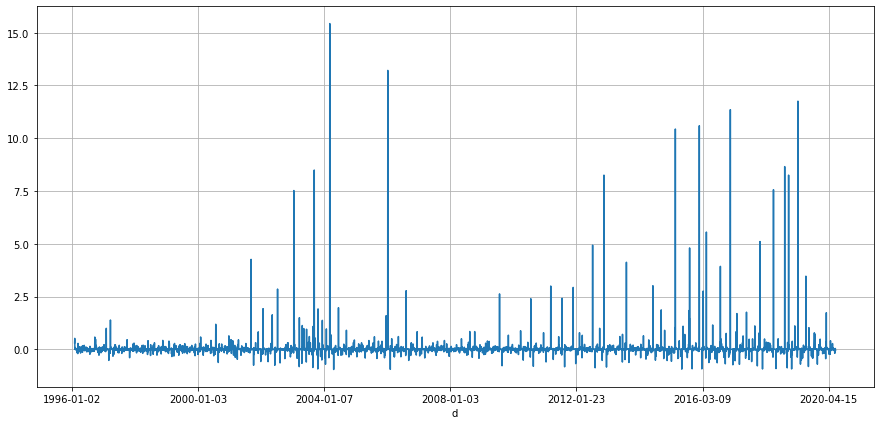

In [13]:
volreservas = sigma_reservas.pct_change().plot(figsize=(15,7))
volreservas.grid()

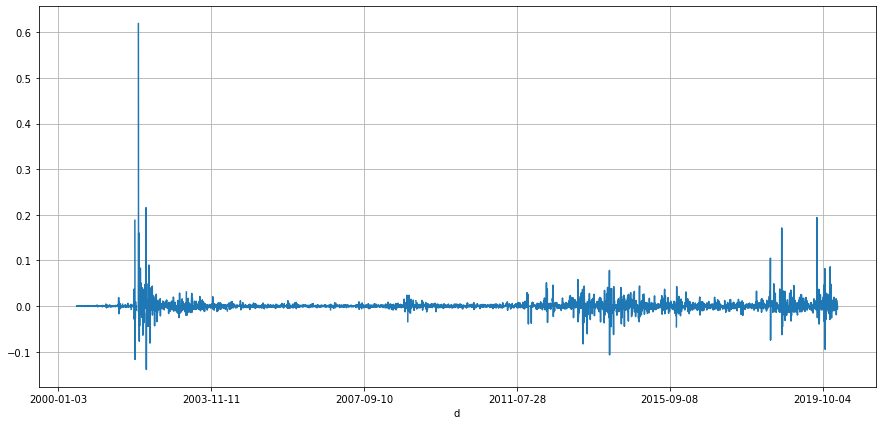

In [14]:
# Calculamos el FPI

FPI = devaluacion - (sigma_tc*(devaluacion) / sigma_reservas*(peligro_reservas)) * peligro_reservas

goldman = FPI.plot(figsize=(15,7))
goldman.grid()

FPI con Dolar Blue

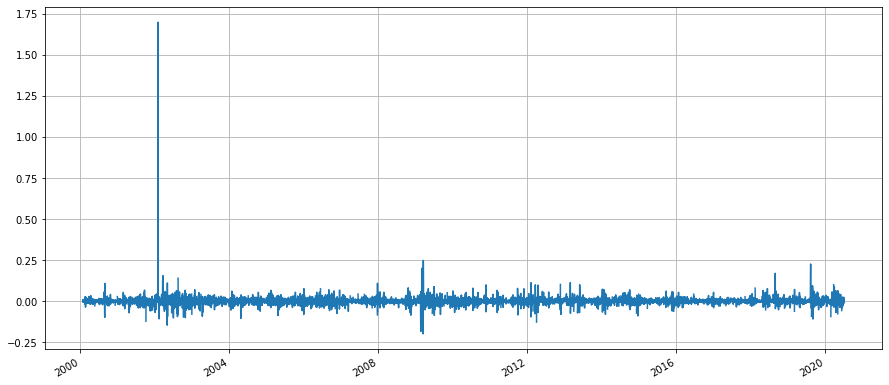

In [15]:
sigma_ypf = tcypf.pct_change().rolling(20).std()
blueypf = tcypf.pct_change()


FPIblue = blueypf - (sigma_ypf*(blueypf) / sigma_reservas*(peligro_reservas)) * peligro_reservas

goldman = FPIblue.plot(figsize=(15,7))
goldman.grid()

In [16]:
FPI = FPI.dropna()
FPI

d
2000-06-22   -0.000500
2000-06-23   -0.000601
2000-06-26    0.000501
2000-06-27    0.000400
2000-06-28   -0.000400
                ...   
2020-02-20    0.006410
2020-02-21   -0.006369
2020-02-26    0.003205
2020-02-27   -0.006390
2020-02-28    0.000000
Length: 4832, dtype: float64

Generamos las variables 1, 2 y 3 desvíos estandars de la serie

In [17]:
sigma1 = FPI.rolling(20).std()
sigma2 = FPI.rolling(20).std() * 2 
sigma3 = FPI.rolling(20).std() * 3
sigma1, sigma2, sigma3

(d
 2000-06-22         NaN
 2000-06-23         NaN
 2000-06-26         NaN
 2000-06-27         NaN
 2000-06-28         NaN
                 ...   
 2020-02-20    0.009318
 2020-02-21    0.008383
 2020-02-26    0.008107
 2020-02-27    0.008253
 2020-02-28    0.008222
 Length: 4832, dtype: float64,
 d
 2000-06-22         NaN
 2000-06-23         NaN
 2000-06-26         NaN
 2000-06-27         NaN
 2000-06-28         NaN
                 ...   
 2020-02-20    0.018636
 2020-02-21    0.016767
 2020-02-26    0.016215
 2020-02-27    0.016506
 2020-02-28    0.016444
 Length: 4832, dtype: float64,
 d
 2000-06-22         NaN
 2000-06-23         NaN
 2000-06-26         NaN
 2000-06-27         NaN
 2000-06-28         NaN
                 ...   
 2020-02-20    0.027954
 2020-02-21    0.025150
 2020-02-26    0.024322
 2020-02-27    0.024759
 2020-02-28    0.024667
 Length: 4832, dtype: float64)

In [27]:
# lo hacemos dataframe y vamos agregando las señales tridimensionales
GSW1 = pd.DataFrame(index=FPI.index)
GSW1['serie'] = FPI 
# generamos señales condicionales de 1, 2 y 3 std Indicio de crisis, Crisis y Megacrisis
GSW1['indicio'] = 0
GSW1['indicio'][:] = np.where((FPI[:] > sigma1[:]) > 0, 0.05, -0.02)


c:\users\pc\python\python37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


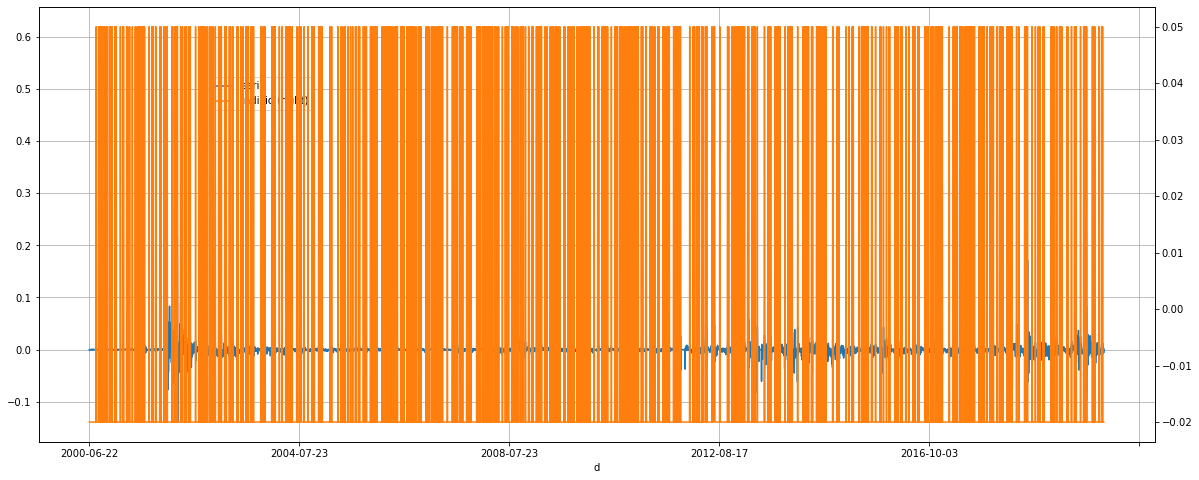

In [28]:
ax = GSW1.plot(secondary_y='indicio', figsize=(20, 8))
ax.get_legend().set_bbox_to_anchor((0.25, 0.85))
ax.grid()

c:\users\pc\python\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


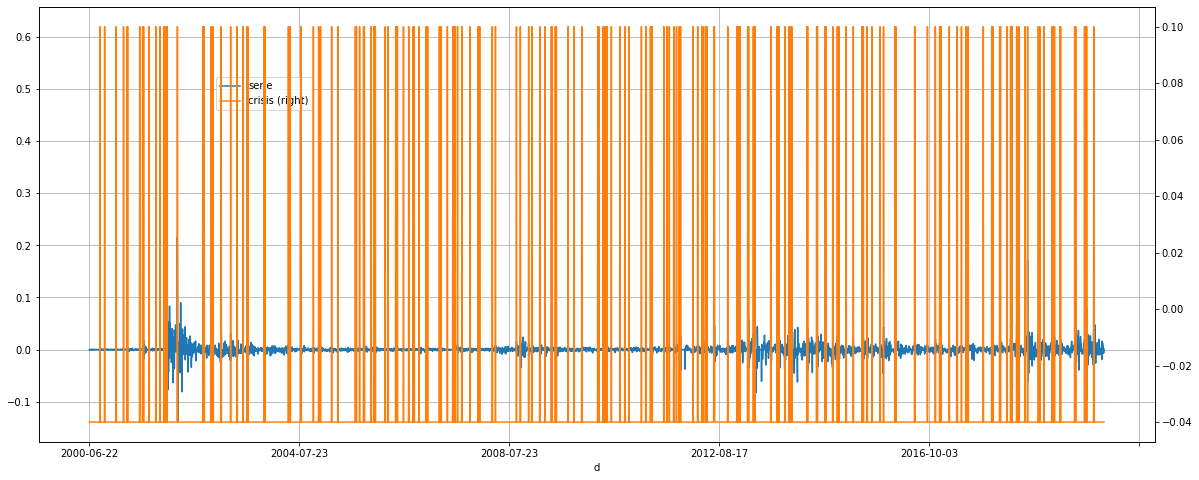

In [29]:
GSW2 = pd.DataFrame(index=FPI.index)
GSW2['serie'] = FPI 
GSW2['crisis'] = 0
GSW2['crisis'][:] = np.where((FPI[:] > sigma2[:]) > 0, 0.1, -0.04)
ax = GSW2.plot(secondary_y='crisis', figsize=(20, 8))
ax.get_legend().set_bbox_to_anchor((0.25, 0.85))
ax.grid()

c:\users\pc\python\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


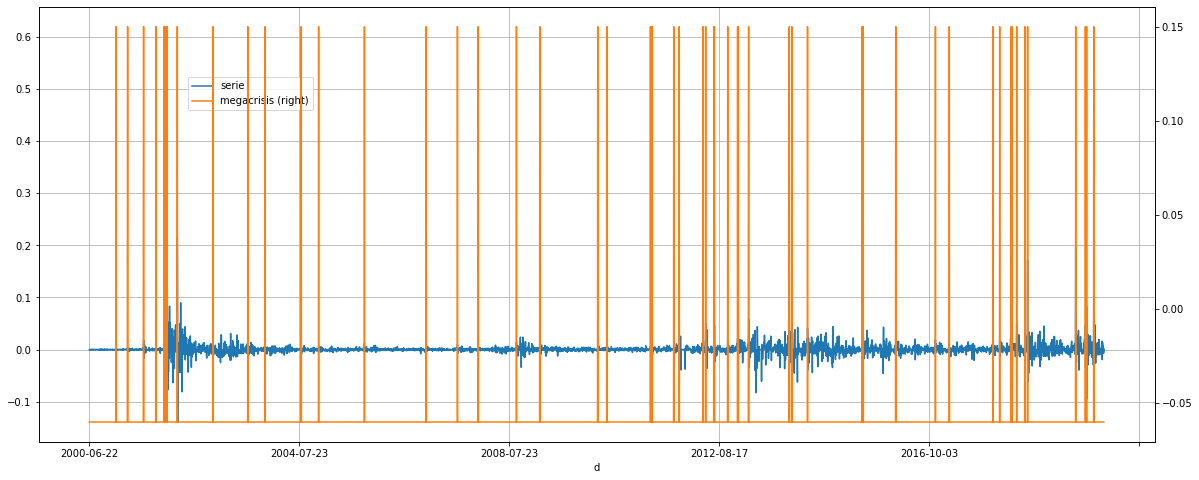

In [30]:
GSW3 = pd.DataFrame(index=FPI.index)
GSW3['serie'] = FPI 
GSW3['megacrisis'] = 0
GSW3['megacrisis'][:] = np.where((FPI[:] > sigma3[:]) > 0, 0.15, -0.06)
ax = GSW3.plot(secondary_y='megacrisis', figsize=(20, 8))
ax.get_legend().set_bbox_to_anchor((0.25, 0.85))
ax.grid()

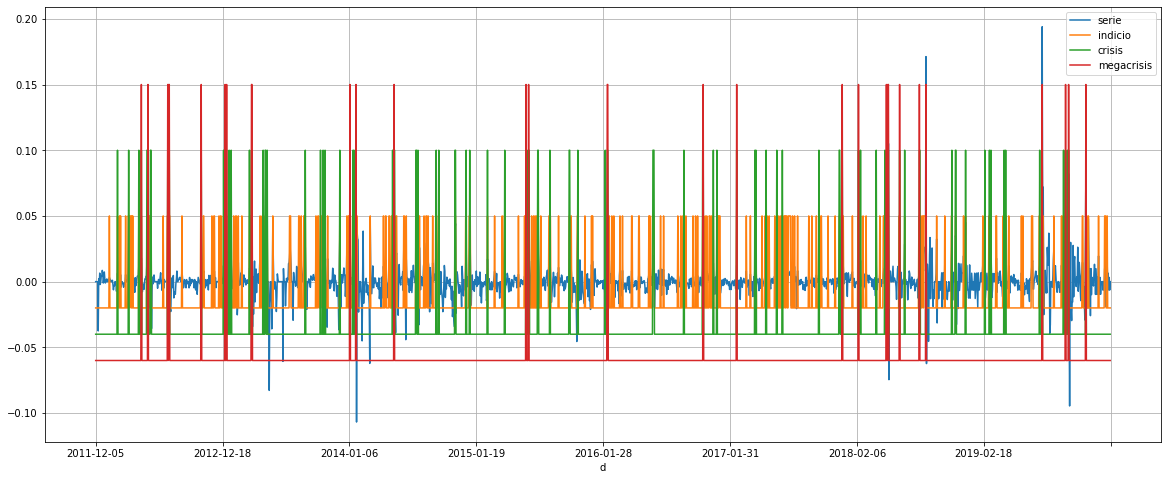

In [31]:
# lo hacemos dataframe y vamos agregando las señales tridimensionales
GSW = pd.DataFrame(index=FPI.index)
GSW['serie'] = FPI 
# generamos señales condicionales de 1, 2 y 3 std Indicio de crisis, Crisis y Megacrisis
GSW['indicio'] = GSW1.indicio.values
GSW['crisis'] = GSW2.crisis.values
GSW['megacrisis'] = GSW3.megacrisis.values
ax = GSW.tail(2000).plot(figsize=(20, 8))
ax.grid()


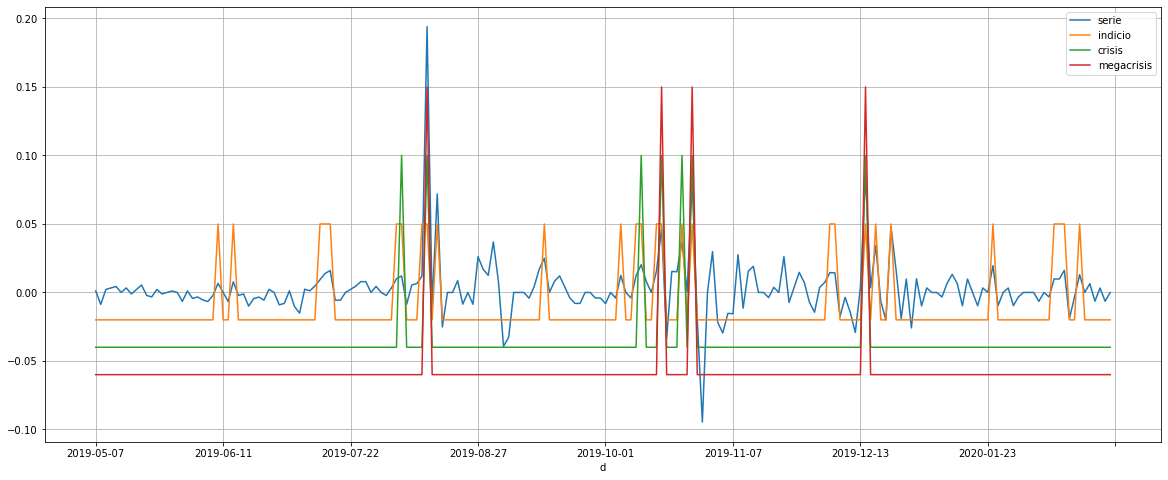

In [33]:
ax = GSW.tail(200).plot(figsize=(20, 8))
ax.grid()

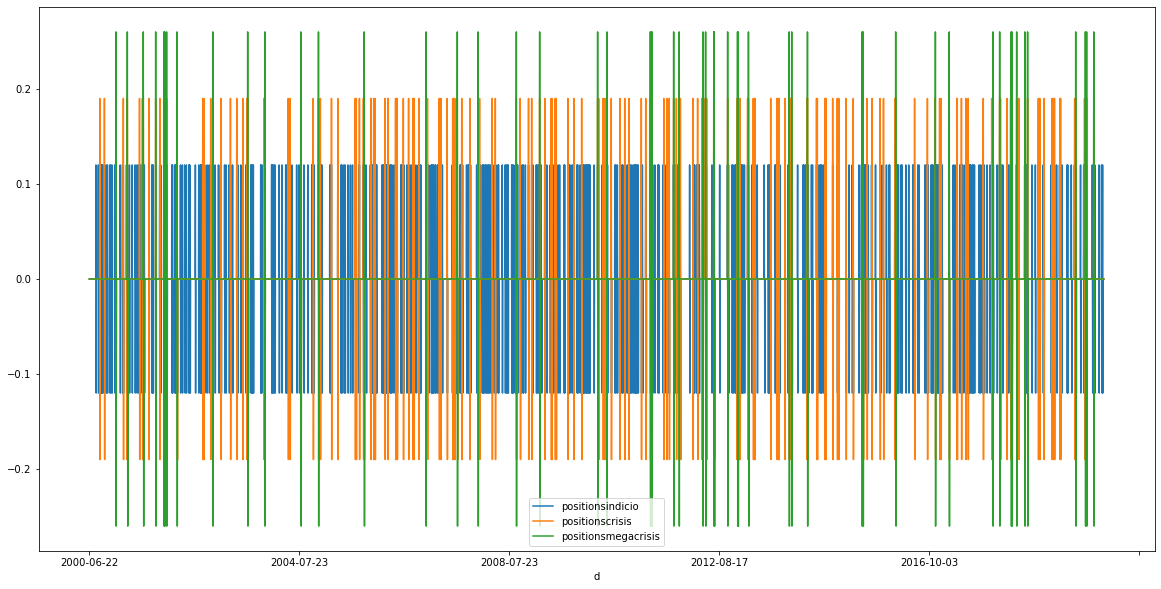

In [24]:
fechas = pd.DataFrame(index=FPI.index)
fechas['positionsindicio'] = GSW1.indicio.diff()
fechas['positionscrisis'] = GSW2.crisis.diff()
fechas['positionsmegacrisis'] = GSW3.megacrisis.diff()

fechas.plot(figsize=(20,10))

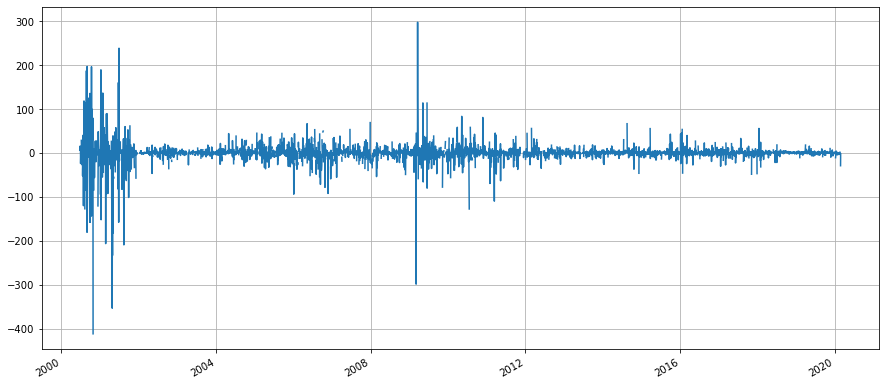

In [34]:
noise = (FPIblue / FPI).plot(figsize=(15,7))
noise.grid()

In [25]:
writer = pd.ExcelWriter('FPI Argentina Oficial.xlsx', engine='xlsxwriter')

In [26]:
reservas.to_excel(writer,sheet_name="reservas")

dolar.to_excel(writer,sheet_name="cotizacionars")

tcypf.to_excel(writer, sheet_name="tc ypf cable")

FPI.to_excel(writer, sheet_name="FPI Oficial")

FPIblue.to_excel(writer, sheet_name="FPI Blue")

GSW.to_excel(writer, sheet_name="GS Watch")

writer.save()